# OVERVIEW

In this assignment, you will perform a supervised text regression task. The data for the task will consist of student essays from The William and Flora Hewlett Foundation. The dataset was created to assist in the design of solutions for automated grading of student-written essays. You will use a subset of this dataset and predict the scores of the essays. You may not use external data to make predictions. 

You will be provided with `training_set_rel.tsv` which contain the text of the essay and the score of each essay.



# PART 1: SETUP

### Q0: Run the following code! 
    
For reproducibility purposes, you will set the random seeds for NumPy and TensorFlow as 1234.  This way, all random steps will produce the same answers.


In [19]:
from numpy.random import seed

import tensorflow as tf

seed(1234)

tf.random.set_seed(seed = 1234)


### Q1: Load the data

We will use data from the [automated essay scoring task](https://www.kaggle.com/c/asap-aes) on Kaggle.

We will only use the training data, which we have provided for you -- you don't need to download anything from Kaggle.

Access the file `training_set_rel.tsv` as provided.  

Use the pandas function `read_csv`, with the parameter `sep=\t` because this is a tab-separated value file (tsv) and `encoding=latin`. 

The columns are described on the [Kaggle site](https://www.kaggle.com/competitions/asap-aes/data)

We will use three columns: `essay`, `essay_set`, and `domain1_score`.

Create a new dataframe with only these three columns, and rename `domain1_score` to just `score`.

Display this dataframe.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [1]:
import os
import pandas as pd
import re


### Q2: Select the data from a single essay set

There are 8 totally unrelated essay sets in this data.

Filter the data frame so we are only considering essay_set = 7

## Graded Cell

This cell is worth 5% of the grade for this assignment.

In [22]:
# select the essay set we are interested in


### Q3: Plot the distribution of scores

Create a plot of a histogram of the scores in the training set.  Comment on what you see.  

One option is to use the seaborn histplot function.  If you use seaborn, you can use the parameter `bins` to set the bin locations if they look strange. The parameter accepts a list of explicit locations. If you want to center the bins on the tick marks, you cand do something like this:

    bins=np.arange(minv,maxv)-0.5
    
where minv and maxv are the mininmum and maximum value in the range, respectively.   This expression indicates the number of possible scores, and that the tick marks should be at the halfway mark of each bar.

You may use some other visualization library if you wish!   The goal is to inspect the distribution of scores.


## Graded Cell

This cell is worth 10% of the grade for this assignment.

<AxesSubplot:xlabel='score', ylabel='Count'>

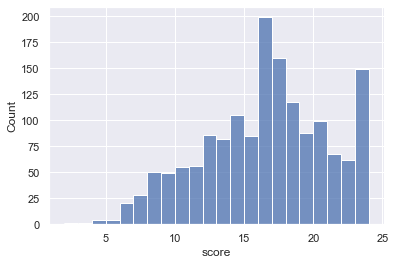

### Q4: Create a test/train split

Use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  Use the `test_size` parameter to control the size of the test set; use 0.2 to indicate a 20% split.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

## Part 2: Conventional Representations

### Q5: Create vectors using term frequency

Use the `CountVectorizer` class from sklearn to create a vector for each essay.  We can't use text directly with machine learning; we need to create a vector of numbers first.  The CountVectorizer creates a vector with one position for each word in the corpus with a value of the number of occurrences of that word in the essay.

The vectorizer works like a model in sklearn: call the fit method on the essay data to "train" a model on the training set.  In this situation, we aren't really training anything, but we need a corpus to define the vectors -- only the words in the corpus we use will be represented in the vector.  

The fit method returns the trained model.  Now we can use the `transform` method to convert any text into a vector.

Call the transform method on the training essays and the test essays to create variables `xtrain` and `xtest`.


Report the number of dimensions for each vector; i.e., the number of terms in the corpus. 


## Graded Cell

This cell is worth 10% of the grade for this assignment.

### Q6: Train a regression model using your vectors

Now that we have vectors, we can train a regression model to predict the essay score.

Use a [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model from sklearn `linear_model` module.

Call the fit method on your training data xtrain and ytrain.

Then call the score method on your test data xtest and ytest.  The score method provides a default evaluation metric.  For the Ridge model, the score method returns $R^2$ which is called the coefficient of determination.  It tells you the proportion of the variation in the essay score is predictable from the essay text: higher is better.

Report the coefficient of determination.

## Graded Cell

This cell is worth 10% of the grade for this assignment.

### Q7: Plot the distribution of scores 

Plot a histogram of your predicted scores.

Plot another histogram of the ground truth scores, superimposed on the first (using seaborn, just call the function again.)

How is your model's distribution of scores different from the ground truth distribution?  Describe how they differ; what kind of mistakes is your model making?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

<AxesSubplot:ylabel='Count'>

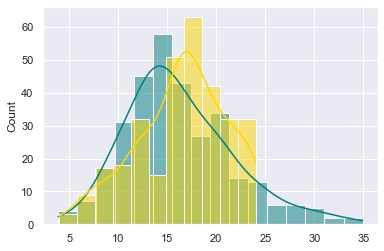

## Part 3: Neural Network Representations


For this part, we will implement a deep sentence embedder to replace the feature selection process. As a first step, choose your model from Part 2.

This time, you will obtain vectors by using a pre-trained neural network model called the Universal Sentence Encoder.  This model will produce a dense vector from any sequence of text. 

First, import the model with the following code.  This step will take considerable time -- it is downloading a large pre-trained model for the first time.


In [26]:
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(module_url)


### Q8: Generate embeddings

Next, you will embed the data with the imported model. The Universal Sentence Encoder takes a list of strings and generates an embedding (i.e., a vector) for each string. 

You can call the model you downloaded like a function. 

Generate a vector for each string in the training set; call this array xtrain.

Also generate a vector for each string in the test set; call this array xtest.

Notice how long this step takes -- it's a big model.

## Graded Cell

This cell is worth 5% of the grade for this assignment.

### Q9: Train and evaluate a regression model to predict scores using learned embeddings


Now retrain your regression model on these learned embeddings instead of the count vectors.

Use the vanilla Ridge model.  Report the score. 

Which model appears to perform the best?

## Graded Cell

This cell is worth 5% of the grade for this assignment.

### Q10: Plot the distribution of scores

Once again, plot a histogram of your predicted scores from your new model.

Plot another histogram of the ground truth scores.

How is your new model's distribution of scores different from the ground truth distribution? Is it doing better than your earlier models?  How is it doing better?


## Graded Cell

This cell is worth 5% of the grade for this assignment.

<AxesSubplot:ylabel='Count'>

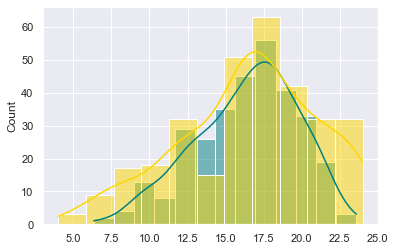

### Q11: Plot the errors

We will analyze the difference between the neural model and your best conventional model.

Plot the distribution of errors -- see where the two models made mistakes.

The errors are your model's predicted score minus the ground truth human score.

Plot a boxplot of the errors for your model using the universal sentence encoder.  Use the seaborn histplot function. 

x will be the ground truth scores and y is the difference between ground truth and your predictions.  

## Graded Cell

This cell is worth 5% of the grade for this assignment.

<AxesSubplot:>

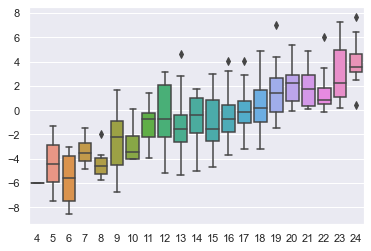

### Q12: Compare models directly

Plot a histogram of the difference between your neural model and the ground truth.

Plot another histogram of the difference between your best conventional model and the ground truth.


Does either model tend to overestimate or underestimate the true score?

## Graded Cell

This cell is worth 10% of the grade for this assignment.

<AxesSubplot:ylabel='Count'>

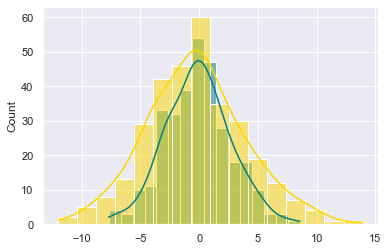

In [27]:
# Write the code for your plot here


Answer the questions here

### Q13: Summarize your findings

Summarize your results. Which approach worked best?  Why?  Does automatic essay scoring appear feasible? How might we improve on this model?


## Graded Cell

This cell is worth 15% of the grade for this assignment.

#### Write your answers to Q13 here: